<a href="https://colab.research.google.com/github/marcosw1998/Data-Science/blob/main-mwac/Project_ee2/predict_covid_spends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos custos do governo de Pernambuco - BR em relação à Covid-19**
* Projeto corresponde a entrega parcial para avaliação na cadeira eletiva IF697 - Intro. a Ciência dos Dados
* Autores: Igor Silva e Marcos Cavalcanti
* Conjunto de dados públicos retirados das seguintes fontes:
  * [Portal da Transparência TCU](http://www.portaltransparencia.gov.br/coronavirus)
  * [Prefeitura do Recife](http://dados.recife.pe.gov.br/dataset?tags=sa%C3%BAde)
  * [Brasil.io](https://brasil.io/dataset/covid19/caso_full/)



## **Por quê o tema?**

* Interesse em entender e expor de forma clara os gastos públicos
* Analisar distribuição de gastos
* Covis-19 é um tema importante e merece muita atenção, pois tem feito muitas vítimas e mudado a forma como a sociedade pensa e se organiza
* Entender a distribuição de gastos é uma boa forma de tentar corrigir erros e minimizar danos futuros na economia e na sociedade

## **Carregando as bibliotecas**

  * Utilizaremos a biblioteca ***`Pandas`*** para trabalhar sobre os dados  e a biblioteca ***`Numpy`*** para operações sobre os datasets.
  



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

### Portal da transparência

* O portal da transparência permite que sejam baixados apenas 1000 registros por vez, portanto decidimos por baixar 2 datasets diferentes e depois fazermos a junção. Os dados são referentes a algumas cidades de Pernambuco 
(Recife, Jaboatão, Olinda, Paulista, Caruaru, Garanhuns, Petrolina, Arcoverde, Serra Talhada, Buíque)

In [55]:
invest_covidPe = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid-pe.csv",encoding = "utf-8")
invest_covidPe2 = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/transferencias_coronavirus.csv",encoding = "utf-8")

In [56]:
#Validando os dados do dataset invest_covidPe
print('Dataset 1',invest_covidPe.shape)
invest_covidPe.sort_values("Município").head()

Dataset 1 (561, 12)


,Mês/Ano,Tipo,Tipo de Favorecido,UF,Nome do Favorecido,CPF/CNPJ,Município,Função,Programa Orçamentário,Ação Orçamentária,Linguagem Cidadã,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,FUNDO MUNICIPAL DE SAUDE,11.371.082/0001-05,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,Sem informação,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,ASSOCICAO DE PAIS E MESTRES,11.252.224/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR MARIA DO SOCORRO DE FREITAS,02.021.769/0001-11,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR DOM BERNARDINO MARCHIO,34.179.420/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,UNIDADE EXECUTORA MAJOR DR.SINVAL,11.441.171/0001-72,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.274.59


In [57]:
#Validando os dados do dataset invest_covidPe2
print('Dataset 2',invest_covidPe2.shape)
invest_covidPe2.sort_values("Município").head()

Dataset 2 (140, 10)


,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido,Unnamed: 9
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00,NaN
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62,NaN
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00,NaN
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71,NaN
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54,NaN


*Podemos perceber que o Dataset **invest_covidPe** possui mais colunas que o Dataset **invest_covidPe2**.  Também notamos que o Dataset invest_covidPe2 possui uma coluna com dados Nan, vamos tratar disso no pré processamento antes de fazer a concatenação dos dois Datasets*

### Dados abertos - Prefeitura do Recife

In [58]:
import requests

dados_pref_rmr = requests.get("http://dados.recife.pe.gov.br/dataset/6c77a814-7161-4eb5-9662-234642dc8cc1/resource/63376b8c-0271-42eb-a88b-cc75c1c3f3fc/download/metadados-hospitais.json").json()

### Dados de casos de Covid-19 por todo o estado de Pernambuco. 
Os valores estão atualizados até o dia 17/03/2021 e foram buscados através do Brasil.io

In [59]:
covidPeCases = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid19-1703-casos.csv",encoding = "utf-8")
print(covidPeCases.shape)
covidPeCases.sort_values("city").head()

(187, 16)


,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
1,202111,2021-03-15,341,PE,Abreu e Lima,2600054.0,city,1700,1694.13828,8,159,1,0.0935,100346.0,True,False
2,202111,2021-03-15,321,PE,Afogados da Ingazeira,2600104.0,city,2478,6624.95990,1,35,0,0.0141,37404.0,True,False
3,202111,2021-03-15,321,PE,Afrânio,2600203.0,city,578,2917.71832,0,9,0,0.0156,19810.0,True,False
4,202111,2021-03-15,326,PE,Agrestina,2600302.0,city,865,3451.02733,2,36,0,0.0416,25065.0,True,False
7,202111,2021-03-15,331,PE,Alagoinha,2600609.0,city,443,3009.91983,0,13,0,0.0293,14718.0,True,False


## **Pré Processamento**
  * Junção de datasets em Dataframe Pandas
  * Tratamento de dados ```NaN```/```null``` ou corrompidos
  * Conversão de tipos
  * Transformação e identificação de dados categóricos
  * Remoção de ***Outliers*** Multivariado

### **Tratamento dos dados de Gastos Públicos**

> Remoção colunas que não fazem parte do dataset invest_covidPe2 e que não influem sobre os nossos estudos (Nome do favorecido, CPF/CNPJ, Linguagem Cidadã)

>```invest_covidPe = invest_covidPe.dropna(axis=1, how='all')```

In [60]:
cols = [4,5,10]
invest_covidPe.drop(invest_covidPe.columns[cols],axis=1,inplace=True)
invest_covidPe.sort_values("Município").head()

,Mês/Ano,Tipo,Tipo de Favorecido,UF,Município,Função,Programa Orçamentário,Ação Orçamentária,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.274.59


> Remoção coluna que tem todos os valores Nan

In [61]:
invest_covidPe2.dropna(axis=1, how='all',inplace=True)
invest_covidPe2.sort_values("Município").head()

,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54


> Retirando prefixo numérico e caracteres especiais dos valores da categoria 'Função'

In [62]:
invest_covidPe_funcao = invest_covidPe2['Função'].map(lambda words: str(words[5:]))
invest_covidPe2['Função'].update(invest_covidPe_funcao)
invest_covidPe2['Função'].unique()

array(['Educação', 'Saúde', 'Assistência social', 'Ciência e Tecnologia'],
      dtype=object)

> Confirmando que as colunas foram removidas e agora os 2 datasets possuem a mesma quantidade de colunas

In [63]:
print('Dataset 1',invest_covidPe.shape)
print('Dataset 2',invest_covidPe2.shape)

Dataset 1 (561, 9)
Dataset 2 (140, 9)


> Fazendo a concatenação dos Dataframes, o resultado final de linhas é igual ao somatório de linhas entre ambos os Datasets

In [64]:
invest_covidPe = invest_covidPe.append(invest_covidPe2, ignore_index=True)

> Filtragem de gastos com a saúde e retirada das colunas **Tipo**, **UF**, **Programa Orçamentário** e **Função** por não conterem dados variados.

In [71]:
len(invest_covidPe2['Tipo de Favorecido'].unique())

3

In [69]:
# Drop colunas com valores unitários

invest_covidPe.drop({'Tipo',\
                     'UF',\
                     'Ação Orçamentária'},\
                    axis=1,\
                    inplace=True \
                    )
invest_covidPe

,Mês/Ano,Tipo de Favorecido,Município,Função,Programa Orçamentário,Ação Orçamentária,Valor Transferido
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,4.130.446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,3.830.136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,3.662.675.00
...,...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 7.327.021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 3.500.000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 8.676.053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,R$ 1.850.000.00


Renomeando colunas

In [72]:
invest_covidPe

,Mês/Ano,Tipo de Favorecido,Município,Função,Programa Orçamentário,Valor Transferido
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.830.136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.662.675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 7.327.021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 3.500.000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 8.676.053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 1.850.000.00


In [73]:
invest_covidPe = invest_covidPe.rename(columns={'Mês/Ano': 'month', \
                                                'Município': 'city', \
                                                'Tipo de Favorecido': 'tipo_favorecido', \
                                                'Programa Orçamentário': 'prog_orcamento', \
                                                'Valor Transferido': 'gastos' \
                                                })
invest_covidPe.head(3)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89


#### **Conversão de tipos das colunas**

  * Valor Transferido (rename -> gastos): ```string``` -> ```float```

  * Mês/Ano (rename -> data_hora): ```string``` -> ```pandas.Datetime```

  * Dados categóricos: ```object``` -> ```category```

In [15]:
invest_covidPe.dtypes

data_hora            object
tipo_favorecido      object
municipio            object
acao_orcamentaria    object
gastos               object
dtype: object

##### **Valor Transferido**
```object``` -> ```float64```

In [74]:
# Tratamento e conversão do CSV-String para float
invest_covidPe['valores_transferidos'] = invest_covidPe['gastos'].apply(lambda words: words.replace('R$ ', ''))
valores_transferidos = invest_covidPe['valores_transferidos'].map(lambda words: float(words[:-3].replace('.','') + words[-3:]))
valores_transferidos = valores_transferidos.astype('float64')
#valores_transferidos = valores_transferidos.astype(float)

In [75]:
invest_covidPe.head(3)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos,valores_transferidos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89,4.130.446.89


In [76]:
# Atualiza o dataset principal
invest_covidPe['gastos'].update(valores_transferidos)
invest_covidPe.drop('valores_transferidos',axis=1,inplace=True)
invest_covidPe = invest_covidPe.infer_objects()
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            701 non-null    object 
 1   tipo_favorecido  701 non-null    object 
 2   city             701 non-null    object 
 3   Função           701 non-null    object 
 4   prog_orcamento   701 non-null    object 
 5   gastos           701 non-null    float64
dtypes: float64(1), object(5)
memory usage: 33.0+ KB


##### **Definindo dados categóricos**

Conversão de dados categóricos
> ```object``` -> ```category```

In [77]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1174944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4130446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3830136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3662675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,7327021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3500000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,8676053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1850000.00


In [78]:
invest_covidPe['month'] = invest_covidPe['month'].astype('category')
invest_covidPe['city'] = invest_covidPe['city'].astype('category')
invest_covidPe['Função'] = invest_covidPe['Função'].astype('category')
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].astype('category')
invest_covidPe['prog_orcamento'] = invest_covidPe['prog_orcamento'].astype('category')
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   month            701 non-null    category
 1   tipo_favorecido  701 non-null    category
 2   city             701 non-null    category
 3   Função           701 non-null    category
 4   prog_orcamento   701 non-null    category
 5   gastos           701 non-null    float64 
dtypes: category(5), float64(1)
memory usage: 10.7 KB


### **Tratamento dos dados de casos de covid-19 em PE**

Filtragem de categorias

In [80]:
covidPeCases = covidPeCases.filter(items=['city', \
                                         'last_available_confirmed', \
                                         'last_available_deaths', \
                                         'last_available_death_rate', \
                                         'estimated_population' \
                                         ])
covidPeCases

,city,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Renomeação de colunas

In [81]:
covidPeCases = covidPeCases.rename(columns={"city": "municipio", \
                                           "last_available_confirmed": "casos_confirmados", \
                                           "last_available_deaths": "mortes_confirmadas", \
                                           "last_available_death_rate": "taxa_mortalidade", \
                                           "estimated_population": "pop_estimada" \
                                           })
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Filtrar cidades do dataset de Gastos públicos

In [82]:
#Guardando uma cópia dos dados de todas as cidades
oldCovidPeCases = covidPeCases

#Filtrando as cidades que selecionamos os gastos no portal da transparência
cities = ['Arcoverde', \
          'Buíque', \
          'Caruaru', \
          'Garanhuns', \
          'Jaboatão dos Guararapes', \
          'Olinda', \
          'Paulista', \
          'Petrolina', \
          'Recife', \
          'Serra Talhada']

covidPeCases = covidPeCases[covidPeCases.municipio.isin(cities)]
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
14,Arcoverde,4281,87,0.0203,74822.0
30,Buíque,1436,23,0.0160,58919.0
45,Caruaru,17187,454,0.0264,365278.0
67,Garanhuns,7250,134,0.0185,140577.0
89,Jaboatão dos Guararapes,19966,1095,0.0548,706867.0
113,Olinda,14581,635,0.0435,393115.0
124,Paulista,7154,528,0.0738,334376.0
128,Petrolina,18239,209,0.0115,354317.0
134,Recife,78117,3168,0.0406,1653461.0
160,Serra Talhada,7341,105,0.0143,86915.0


In [83]:
covidPeCases.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 14 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           10 non-null     object 
 1   casos_confirmados   10 non-null     int64  
 2   mortes_confirmadas  10 non-null     int64  
 3   taxa_mortalidade    10 non-null     float64
 4   pop_estimada        10 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 480.0+ bytes


In [84]:
covidPeCases['municipio'] = covidPeCases['municipio'].apply(lambda city: city.upper())
covidPeCases['municipio'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['ARCOVERDE', 'BUÍQUE', 'CARUARU', 'GARANHUNS',
       'JABOATÃO DOS GUARARAPES', 'OLINDA', 'PAULISTA', 'PETROLINA',
       'RECIFE', 'SERRA TALHADA'], dtype=object)

In [85]:
covidPeCases['municipio'] = covidPeCases['municipio'].astype('category')
covidPeCases['id'] = covidPeCases['municipio'].cat.codes
covidPeCases.index = covidPeCases['id']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada,id
id,,,,,,
0,ARCOVERDE,4281,87,0.0203,74822.0,0
1,BUÍQUE,1436,23,0.0160,58919.0,1
2,CARUARU,17187,454,0.0264,365278.0,2
3,GARANHUNS,7250,134,0.0185,140577.0,3
4,JABOATÃO DOS GUARARAPES,19966,1095,0.0548,706867.0,4
5,OLINDA,14581,635,0.0435,393115.0,5
6,PAULISTA,7154,528,0.0738,334376.0,6
7,PETROLINA,18239,209,0.0115,354317.0,7
8,RECIFE,78117,3168,0.0406,1653461.0,8


### **Remoção de outliers multivariado**
> Método utilizado:
  * Local Outlier Factor

> Conjunto:
  * ```investCovidPE```

Categorizando Gastos públicos

Método para vincular os dados de municípios entre os dois Conjuntos de Dados

In [86]:
def categorizar_municipio(city):
  return covidPeCases[covidPeCases['municipio'] == str(city)].index.values.astype(int)[0]

In [87]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1174944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4130446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3830136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3662675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,7327021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3500000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,8676053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1850000.00


In [88]:
invest_covidPe['city'] = invest_covidPe['city'].map(lambda city: city.replace(city, str(categorizar_municipio(city))))
invest_covidPe['month'] = invest_covidPe['month'].cat.codes
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].cat.codes
invest_covidPe['Função'] = invest_covidPe['Função'].cat.codes
invest_covidPe['prog_orcamento'] = invest_covidPe['prog_orcamento'].cat.codes

In [89]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,16,2,8,3,0,60000.00
1,10,2,3,3,0,1174944.27
2,10,2,7,3,0,4130446.89
3,10,2,5,3,0,3830136.03
4,10,2,2,3,0,3662675.00
...,...,...,...,...,...,...
696,1,2,4,3,0,7327021.87
697,7,2,8,3,0,3500000.00
698,4,2,7,3,0,8676053.00
699,4,2,1,3,0,1850000.00


#### **Local Outlier Factor**

In [90]:
invest_covidPe_lof = invest_covidPe
print("Quantidade de linhas: " + str(len(invest_covidPe)))

Quantidade de linhas: 701


In [91]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)

In [92]:
scores = clf.fit_predict(invest_covidPe_lof)

In [93]:
# Valor de LOF
-1*clf.negative_outlier_factor_

array([ 5.06971635,  1.15786907,  1.01278478,  1.00743069,  0.97511367,
        1.38735342,  1.14246381,  0.98157289,  0.9388996 ,  1.06181494,
        1.03345647,  1.00099309,  1.46929685,  0.96742528,  1.19792081,
        1.05815846,  1.32094043,  1.11359083,  0.88391166,  1.28701849,
        1.0212535 ,  1.05815846,  1.0811027 ,  1.03028305,  0.96950344,
        1.09989847,  1.71633666,  1.09000524,  1.17392687,  1.32513031,
        1.24460724,  1.24460724,  0.98706486,  0.95898566,  0.9073941 ,
        1.17776213,  1.30074647,  0.94080509,  1.1715444 ,  1.04785782,
        0.98969908,  1.22973992,  0.93931047,  1.10569106,  1.11086791,
        1.01557319,  0.95207123,  1.0404531 ,  1.40262619,  1.03760092,
        0.98506443,  1.31220318,  0.94483734,  1.00836771,  1.03237359,
        1.37091875,  1.17742638,  0.99612669,  1.02220098,  0.93716132,
        0.99639615,  1.03665054,  1.04930928,  1.3951037 ,  1.09881899,
        1.15364448,  1.13640352,  1.02526121,  1.08286789,  0.97

In [94]:
scores

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [95]:
invest_covidPe_lof['outlier'] = scores
print(invest_covidPe_lof.head())

   month  tipo_favorecido city  Função  prog_orcamento      gastos  outlier
0     16                2    8       3               0    60000.00       -1
1     10                2    3       3               0  1174944.27        1
2     10                2    7       3               0  4130446.89        1
3     10                2    5       3               0  3830136.03        1
4     10                2    2       3               0  3662675.00        1


In [96]:
invest_covidPe_lof[invest_covidPe_lof['outlier'] == -1]

,month,tipo_favorecido,city,Função,prog_orcamento,gastos,outlier
0,16,2,8,3,0,60000.00,-1
26,14,2,8,0,2,2264395.80,-1
96,17,1,8,2,1,-534.86,-1
149,17,1,8,2,1,-1084.16,-1
212,17,1,7,2,1,12037.82,-1
241,17,1,8,2,1,-1248.01,-1
243,17,1,8,2,1,-2529.72,-1
259,17,1,2,2,1,1342.91,-1
562,8,1,8,2,1,-1619.02,-1
589,8,1,8,2,1,-3777.73,-1


In [97]:
invest_covidPe_lof = invest_covidPe_lof[invest_covidPe_lof['outlier'] != -1]
len(invest_covidPe_lof)

688

In [98]:
invest_covidPe_lof = invest_covidPe_lof[invest_covidPe_lof['outlier'] != -1]
invest_covidPe_lof = invest_covidPe_lof.drop(columns=['outlier'])

invest_covidPe_lof.head(5)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
1,10,2,3,3,0,1174944.27
2,10,2,7,3,0,4130446.89
3,10,2,5,3,0,3830136.03
4,10,2,2,3,0,3662675.00
5,10,2,4,3,0,7327021.87


In [ ]:
covidPeCases['pop_estimada'] = covidPeCases['pop_estimada'].astype('int64')
covidPeCases['taxa_mortalidade'] = covidPeCases['taxa_mortalidade'] * 100
covidPeCases['confirmados_por_populacao'] = (covidPeCases['confirmados_por_populacao'] * 100).round(2)
covidPeCases['gastos_por_habitante'] = (covidPeCases['gastos'] / covidPeCases['pop_estimada']).round(2)

# Projeto 2



1. Escolher uma	das	colunas	dos	dados	utilizados	no	projeto 1	para predição	(classificação ou regressão)	
  * Classificação : Rótulos são categorias discretas
  * Regressão: rótulos são valores contínuos
2. Separar os	dados	em treinamento,	validação	e	teste
3. Selecionar	4	algoritmos	de	acordo	com	a	tarefa escolhida
no	passo	1	

 **Algoritmos de classificação:**

* Scikit-Learn's Estimator API
  - Vários algoritmos implementados
  - Uniformidade
  - Modelos para algoritmo Supervisionado: função predict e Não-supervisionado: função transform ou predict
* Random Forest 
  - Vários estimadores combinados para evitar overfitting
  - Não assume distribuição gaussiana, obtém ótimos resultados

* Algoritmo de construção  
  - Execução rápida, lida bem com dados ausentes
  - Mostra a importância das features na classificação
  

**Medidas para avaliação da qualidade do modelo:**
Os valores de erro são dados em '%'

* Viés = Erro no treinamento - Erro Alvo (Desempenho no conjunto de treinamento)
* Variância = Erro no teste - Erro no treinamento


Possíveis cenários de viés e Variância

Overfitting:
  - Bom desempenho somente no conjunto de treinamento.
  - Apresenta problemas para generalizar
  - Ex : Erro no treinamento: 1%, Erro no teste: 11% (Baixo viés, Alta variância)
  - Para melhorar o desempenho : Adicionar mais dados ao conjunto de treinamento, diminuir a complexidade do modelo, selecionar melhor as features.

Underfitting:
  - Não modela bem o conjunto de treinamento, problemas em generalizar
  - Ex: Erro no treinamento 15%, Erro no teste: 16% (ALto viés, Baixa variância)
 - Para melhorar o desempenho : Aumentar a complexidade, adicionar mais features.

Caso ideal:
  - Erro no treinamento: 0.5%, Erro no teste: 1%


## Classificação 1
> Classificador com baixa complexidade
  * NaiveBayes
  * J48 (Decision Tree)

In [108]:
#dados

#https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import train_test_split
import seaborn as sns


ClassTest = invest_covidPe_lof
X_ClassTest = ClassTest.drop('prog_orcamento', axis=1)
Y_ClassTest = ClassTest['prog_orcamento']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_ClassTest, Y_ClassTest,
                                                random_state=3)

#O random_state = 3 apresentou 81,5% de acurácia, foi o melhor de 1 a 10. Acrescentei as features de data e município, porém não contribuiram positivamente.


In [109]:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo
model.fit(Xtrain, Ytrain)                  # 3. criação do modelo
Y_model = model.predict(Xtest)             # 4. predição em novos dados

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Y_model)

0.877906976744186

### **F1Score**

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall

In [112]:
from sklearn.metrics import f1_score
print(f1_score(Y_model, Ytest, average='macro'))
print(f1_score(Y_model, Ytest, average='micro'))
print(f1_score(Y_model, Ytest, average='weighted'))
#print(f1_score(Y_model, Ytest, zero_division=1))

0.4209635316250102
0.877906976744186
0.8712663618283019


## Classificação 2
> Classificador com alta complexidade
  * KNN
  * Random Forest
  * SVM

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

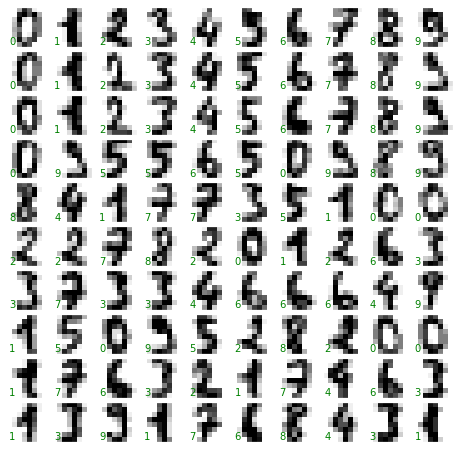

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

ACC TRAINING:0.8574610244988864
ACC TEST:0.8333333333333334


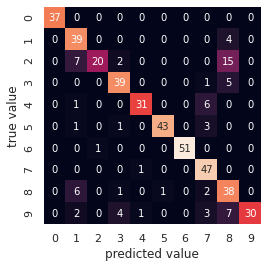

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Regressão
  * Linear
  * Por Árvore de Decisão
  * Por Random Forest
  

In [149]:
RegressionTest = invest_covidPe[['Função','gastos']]

In [133]:
RegressionTest.shape

(701, 2)

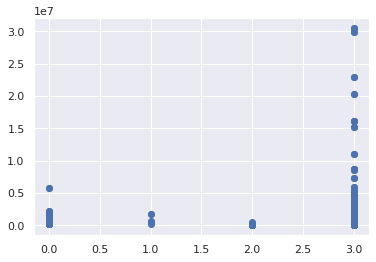

In [151]:
plt.scatter(RegressionTest['Função'], RegressionTest['gastos'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


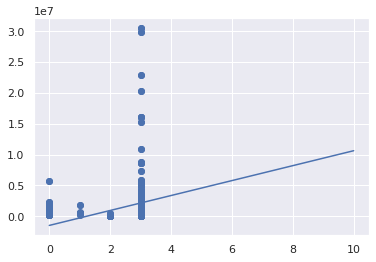

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

#rng = np.random.RandomState(1)
#x = 10 * rng.rand(24)

x = RegressionTest['Função']
y = RegressionTest['gastos']

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model inclinação:      {:.3f}".format(model.coef_[0]))
print("Model intercepto:     {:.3f}".format(model.intercept_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


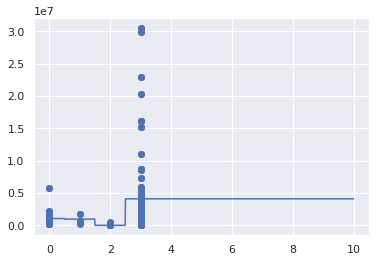

In [153]:
# Regressão por Floresta aleatória
from sklearn.ensemble import RandomForestRegressor

x = RegressionTest['Função']
y = RegressionTest['gastos']

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = regr.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


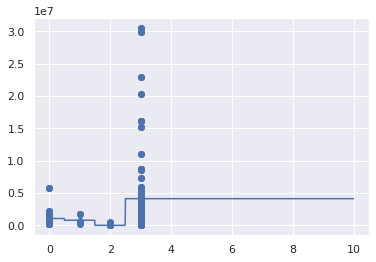

In [154]:
# Regressão por árvore de decisão
from sklearn import tree
model = tree.DecisionTreeRegressor()

#rng = np.random.RandomState(1)
#x = 10 * rng.rand(24)

x = RegressionTest['Função']
y = RegressionTest['gastos']

model = model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## SHAP
  > Fins comparativos com a Regressão Linear e ensembles
  * Correlação individualizada das features com os gastos do Governo de PE com a covid-19 em diversos setores e municípios

In [158]:
!pip install shap

     |████████████████████████████████| 358kB 5.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=db301a4d97f5184077c10b80fb2c3f297b57ae7b41e35a4fb787670b34c65d17
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [159]:
import shap
import xgboost

In [173]:
X = invest_covidPe.iloc[:,:5].values
y = invest_covidPe.iloc[:,5].values

In [174]:
model = xgboost.XGBRegressor().fit(X, y)

[02:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


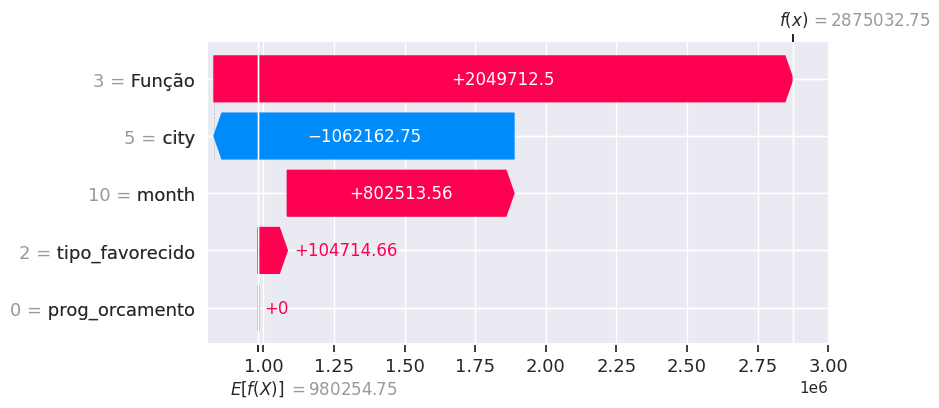

In [176]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.waterfall_plot(shap.Explanation(feature_names=invest_covidPe.columns[:5],values=shap_values[3]))

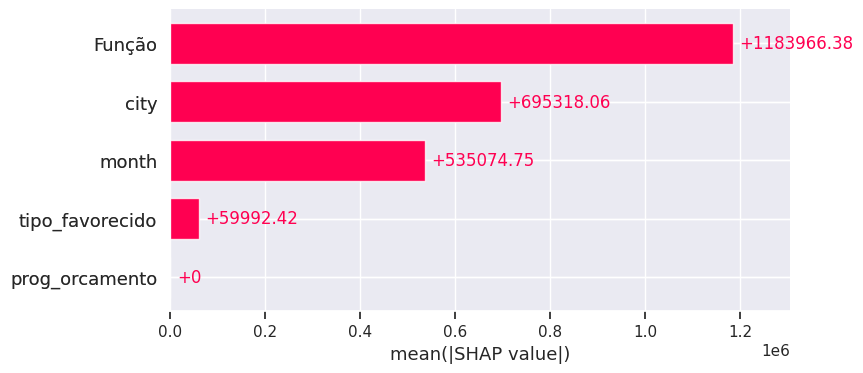

In [177]:
shap.plots.bar(shap.Explanation(feature_names=invest_covidPe.columns[:5],values=shap_values))

## Vacina

In [ ]:
#Data from http://transparencia.recife.pe.gov.br/codigos/web/covid19vacinados/vacinados.php

RecifeVaccines = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/vacinados_2021-04-04-11-04.csv",encoding = "utf-8")

In [ ]:
RecifeVaccines

,Grupo,Dose,Data Vacina
0,IDOSOS,2,04/04/2021
1,IDOSOS,2,04/04/2021
2,IDOSOS,2,04/04/2021
3,IDOSOS,2,04/04/2021
4,TRABALHADORES DA SAÃšDE,1,04/04/2021
...,...,...,...
59447,TRABALHADORES DA SAÃšDE,2,11/04/2021
59448,IDOSOS,2,11/04/2021
59449,IDOSOS,2,11/04/2021
59450,IDOSOS,1,11/04/2021


In [ ]:
#x = ['04/04/2021','05/04/2021','06/04/2021','07/04/2021','08/04/2021','09/04/2021','10/04/2021','11/04/2021']

 #RecifeVaccines.groupby(level="Data Vacina").sum()
#x = RecifeVaccines["Data Vacina"].unique()

#x = pd.DataFrame({"Date": RecifeVaccines['Data Vacina'].unique()})

#x["Date"] = pd.to_datetime(x["Date"]).dt.strftime("%m")
#print( x )

['04/04/2021' '05/04/2021' '06/04/2021' '07/04/2021' '08/04/2021'
 '09/04/2021' '10/04/2021' '11/04/2021']


In [ ]:
x = np.array([4,5,6,7,8,9,10,11])
x = x.reshape(1, -1)
x

array([[ 4,  5,  6,  7,  8,  9, 10, 11]])

In [ ]:
 #RecifeVaccines.groupby(level="Data Vacina").sum()
y = RecifeVaccines.groupby(by="Data Vacina").sum()['Dose'].values

In [ ]:
Dose1 = RecifeVaccines[(RecifeVaccines['Dose']== 1)]
Dose1

,Grupo,Dose,Data Vacina
4,TRABALHADORES DA SAÃšDE,1,04/04/2021
7,IDOSOS,1,04/04/2021
15,IDOSOS,1,04/04/2021
19,IDOSOS,1,04/04/2021
21,IDOSOS,1,04/04/2021
...,...,...,...
59441,TRABALHADORES DA SAÃšDE,1,11/04/2021
59442,IDOSOS,1,11/04/2021
59446,IDOSOS,1,11/04/2021
59450,IDOSOS,1,11/04/2021


In [ ]:
Dose2 = RecifeVaccines[(RecifeVaccines['Dose']== 2)]
Dose2

,Grupo,Dose,Data Vacina
0,IDOSOS,2,04/04/2021
1,IDOSOS,2,04/04/2021
2,IDOSOS,2,04/04/2021
3,IDOSOS,2,04/04/2021
5,TRABALHADORES DA SAÃšDE,2,04/04/2021
...,...,...,...
59444,TRABALHADORES DA SAÃšDE,2,11/04/2021
59445,IDOSOS,2,11/04/2021
59447,TRABALHADORES DA SAÃšDE,2,11/04/2021
59448,IDOSOS,2,11/04/2021


In [ ]:
y1 = Dose1.groupby(by="Data Vacina").sum()['Dose'].values
y1 = y1.reshape(1, -1)
y1

array([[2150, 6040, 5666, 5395, 4652, 4466, 3988, 3957]])

In [ ]:
y2 = Dose2.groupby(by="Data Vacina").sum()['Dose'].values
y2 = y2.reshape(1, -1)
y2

array([[11038,  3854,  4484,  4832,  6128,  5360,  6106,  4474]])

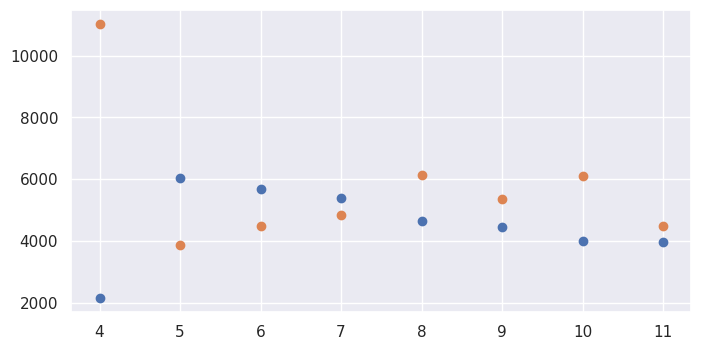

In [ ]:
plt.scatter(x,y1)
plt.scatter(x,y2)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y1)

xfit = np.linspace(4, 11, 1000)
xfit = xfit.reshape(1, -1)
yfit = model.predict(xfit)

plt.scatter(x, y1)
plt.plot(xfit, yfit);

ValueError: ignored